In [1]:
%matplotlib inline
import seaborn
import numpy, scipy, matplotlib.pyplot as plt, IPython.display as ipd
import librosa, librosa.display
plt.rcParams['figure.figsize'] = (11, 5)

[&larr; Back to Index](index.html)

# Segmentation

In audio processing, it is common to operate on one frame at a time using a constant frame size and hop size (i.e. increment). Frames are typically chosen to be 10 to 100 ms in duration.

Let's create an audio signal consisting of a pure tone that gradually gets louder. Then, we will segment the signal and compute the **root mean square (RMS) energy** for each frame.

First, set our parameters:

In [2]:
T = 3.0      # duration in seconds
sr = 22050   # sampling rate in Hertz
amplitude = numpy.logspace(-3, 0, int(T*sr), endpoint=False, base=10.0) # time-varying amplitude
print(amplitude.min(), amplitude.max()) # starts at 110 Hz, ends at 880 Hz

0.001 0.9998955798243658


Create the signal:

In [3]:
t = numpy.linspace(0, T, int(T*sr), endpoint=False)
x = amplitude*numpy.sin(2*numpy.pi*440*t)

Listen to the signal:

In [4]:
ipd.Audio(x, rate=sr)

Plot the signal:

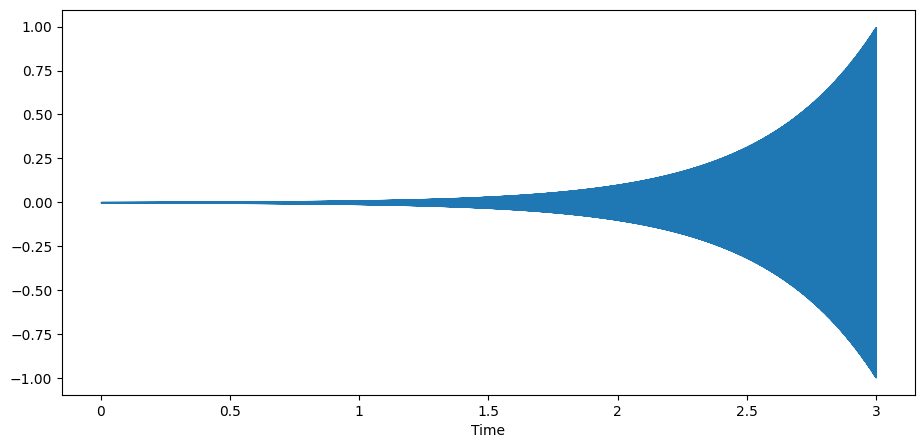

In [5]:
librosa.display.waveshow(x, sr=sr);

## Segmentation Using Python List Comprehensions

In Python, you can use a standard [list comprehension](https://docs.python.org/2/tutorial/datastructures.html#list-comprehensions) to perform segmentation of a signal and compute RMSE at the same time.

Initialize segmentation parameters:

In [6]:
frame_length = 1024
hop_length = 512

Define a helper function:

In [7]:
def rmse(x):
    return numpy.sqrt(numpy.mean(x**2))

Using a list comprehension, plot the RMSE for each frame on a log-y axis:

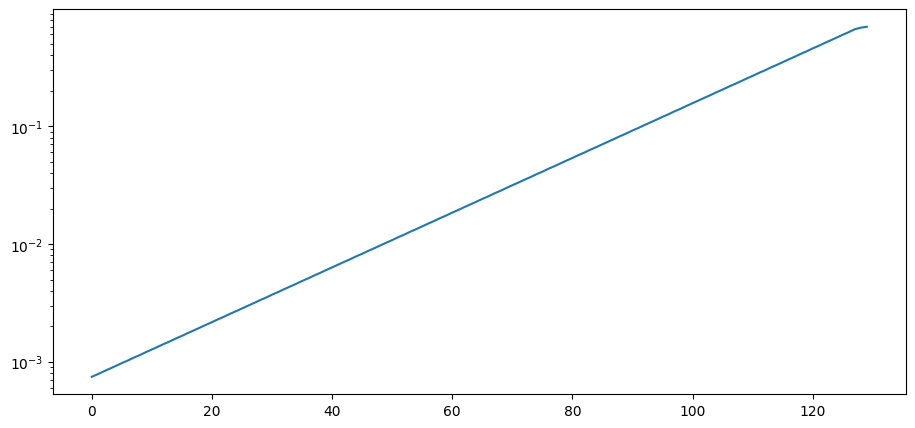

In [8]:
plt.semilogy([rmse(x[i:i+frame_length])
              for i in range(0, len(x), hop_length)]);

## `librosa.util.frame`

Given a signal, [`librosa.util.frame`](https://librosa.github.io/librosa/generated/librosa.util.frame.html#librosa.util.frame) will produce a list of uniformly sized frames:

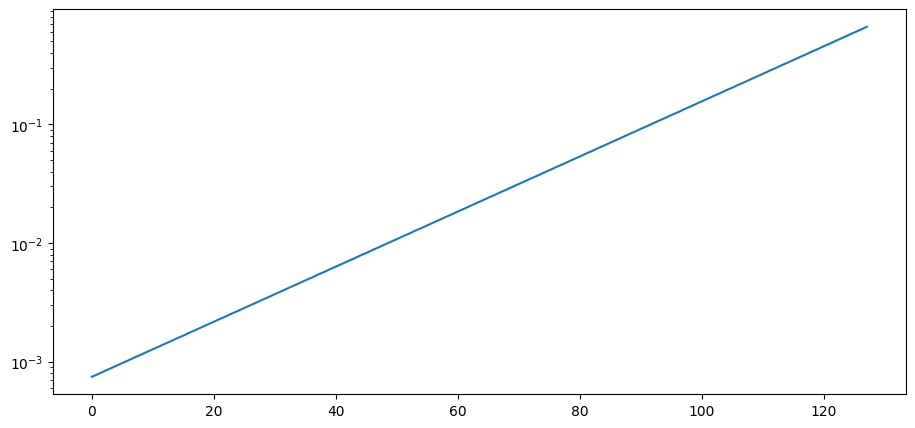

In [9]:
frames = librosa.util.frame(x, frame_length=frame_length, hop_length=hop_length)
plt.semilogy([rmse(frame) for frame in frames.T]);

That being said, in `librosa`, manual segmentation of a signal is often unnecessary, because the feature extraction methods themselves do segmentation for you.

[&larr; Back to Index](index.html)